In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

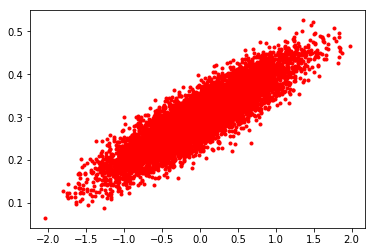

In [2]:
x = np.random.normal(0.0, 0.55, (10000, 1))
y = x * 0.1 + 0.3 + np.random.normal(0.0, 0.03, (10000,1))
                     
plt.plot(x, y, 'r.')
plt.show()

In [3]:
# 어떤 input(feature)이 neural net에 전달될지
feature_columns = [tf.feature_column.numeric_column("inputs", shape=[1])]

# nerual net 구성
classifier = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=tf.train.GradientDescentOptimizer(0.01))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cx/3d9bsg5s1tl8bhgnbrk7stm80000gn/T/tmpqm419gno', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb22935ba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [4]:
# train or evaluation 시 사용할 input function
# 위에서 정의한 feature column과 동일한 key 값을 가진 data를 return해 주어야 한다.
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'inputs':x},
    y=y,
    num_epochs = None,
    shuffle = True )

test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'inputs':x},
    y=y,
    num_epochs = 10,
    shuffle = True )

In [5]:
classifier.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/cx/3d9bsg5s1tl8bhgnbrk7stm80000gn/T/tmpqm419gno/model.ckpt.
INFO:tensorflow:loss = 11.894257, step = 1
INFO:tensorflow:global_step/sec: 744.64
INFO:tensorflow:loss = inf, step = 101 (0.136 sec)
ERROR:tensorflow:Model diverged with loss = NaN.


NanLossDuringTrainingError: NaN loss during training.